In [2]:
!pip install TextBlob
!pip install wordcloud

import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 151.4/151.4 kB 8.8 MB/s eta 0:00:00


In [57]:
df = pd.read_csv('moon_under_water_merged.csv')
df

,Reviewer Name,Review Date,Star Rating,Review Text,Total Reviews by Reviewer,Number of Images,Image URLs
0,Maggie Savidge,2 months ago,5,It was quite busy when we arrived so struggled...,398 reviews,4,https://lh5.googleusercontent.com/p/AF1QipNAPb...
1,Nicola King,4 weeks ago,4,Lovely little place in Manchester.\nFriendly s...,112 reviews,4,https://lh5.googleusercontent.com/p/AF1QipPipL...
2,Aaron Holmes-Doyle,3 weeks ago,5,I was visiting Manchester for a night out with...,52 reviews,3,https://lh5.googleusercontent.com/p/AF1QipM8K0...
3,Hiren Shah,3 months ago,5,There's nothing like a good Weatherspoons. You...,20 reviews,3,https://lh5.googleusercontent.com/p/AF1QipMGSe...
4,Giovanni Sumano,5 months ago,5,Beautifully decorated. You know you can't get ...,57 reviews,2,https://lh5.googleusercontent.com/p/AF1QipNOku...
...,...,...,...,...,...,...,...
2405,Andrea S,a year ago,5,No review text,2 reviews,0,NaN
2406,Daniel Smith,a year ago,5,No review text,18 reviews,0,NaN
2407,Rob Moore,a year ago,4,No review text,17 reviews,0,NaN
2408,Debbie Ashworth,a year ago,5,Nice friendly staff,63 reviews,0,NaN


In [59]:
def preprocess_text(text):
    # If the text is "No review text", return an empty string
    if text == "No review text":
        return ''

    return text
df['Review Text'] = df['Review Text'].astype(str).apply(preprocess_text)
df

,Reviewer Name,Review Date,Star Rating,Review Text,Total Reviews by Reviewer,Number of Images,Image URLs
0,Maggie Savidge,2 months ago,5,It was quite busy when we arrived so struggled...,398 reviews,4,https://lh5.googleusercontent.com/p/AF1QipNAPb...
1,Nicola King,4 weeks ago,4,Lovely little place in Manchester.\nFriendly s...,112 reviews,4,https://lh5.googleusercontent.com/p/AF1QipPipL...
2,Aaron Holmes-Doyle,3 weeks ago,5,I was visiting Manchester for a night out with...,52 reviews,3,https://lh5.googleusercontent.com/p/AF1QipM8K0...
3,Hiren Shah,3 months ago,5,There's nothing like a good Weatherspoons. You...,20 reviews,3,https://lh5.googleusercontent.com/p/AF1QipMGSe...
4,Giovanni Sumano,5 months ago,5,Beautifully decorated. You know you can't get ...,57 reviews,2,https://lh5.googleusercontent.com/p/AF1QipNOku...
...,...,...,...,...,...,...,...
2405,Andrea S,a year ago,5,,2 reviews,0,NaN
2406,Daniel Smith,a year ago,5,,18 reviews,0,NaN
2407,Rob Moore,a year ago,4,,17 reviews,0,NaN
2408,Debbie Ashworth,a year ago,5,Nice friendly staff,63 reviews,0,NaN


In [60]:
df['Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['word_count'] = df['Review Text'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['Review Text'].apply(lambda x: len(str(x)))

In [61]:
df

,Reviewer Name,Review Date,Star Rating,Review Text,Total Reviews by Reviewer,Number of Images,Image URLs,Polarity,word_count,review_len
0,Maggie Savidge,2 months ago,5,It was quite busy when we arrived so struggled...,398 reviews,4,https://lh5.googleusercontent.com/p/AF1QipNAPb...,0.298667,45,239
1,Nicola King,4 weeks ago,4,Lovely little place in Manchester.\nFriendly s...,112 reviews,4,https://lh5.googleusercontent.com/p/AF1QipPipL...,0.330833,23,130
2,Aaron Holmes-Doyle,3 weeks ago,5,I was visiting Manchester for a night out with...,52 reviews,3,https://lh5.googleusercontent.com/p/AF1QipM8K0...,0.520833,43,236
3,Hiren Shah,3 months ago,5,There's nothing like a good Weatherspoons. You...,20 reviews,3,https://lh5.googleusercontent.com/p/AF1QipMGSe...,0.464550,50,280
4,Giovanni Sumano,5 months ago,5,Beautifully decorated. You know you can't get ...,57 reviews,2,https://lh5.googleusercontent.com/p/AF1QipNOku...,0.151538,28,165
...,...,...,...,...,...,...,...,...,...,...
2405,Andrea S,a year ago,5,,2 reviews,0,NaN,0.000000,0,0
2406,Daniel Smith,a year ago,5,,18 reviews,0,NaN,0.000000,0,0
2407,Rob Moore,a year ago,4,,17 reviews,0,NaN,0.000000,0,0
2408,Debbie Ashworth,a year ago,5,Nice friendly staff,63 reviews,0,NaN,0.487500,3,19


In [63]:
import string

# List of common English stopwords
stopwords = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", 
    "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", 
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", 
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", 
    "at", "by", "for", "with", "about", "against", "between", "into", "through", 
    "during", "before", "after", "above", "below", "to", "from", "up", "down", 
    "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "nan"
]

def preprocess_text2(text):
    # If the text is "No review text", return an empty string
    if text == "No review text":
        return ''
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords])
    
    return text



In [64]:
# Apply the preprocessing function to the 'Review Text' column
df['Cleaned Review'] = df['Review Text'].astype(str).apply(preprocess_text2)
df

,Reviewer Name,Review Date,Star Rating,Review Text,Total Reviews by Reviewer,Number of Images,Image URLs,Polarity,word_count,review_len,Cleaned Review
0,Maggie Savidge,2 months ago,5,It was quite busy when we arrived so struggled...,398 reviews,4,https://lh5.googleusercontent.com/p/AF1QipNAPb...,0.298667,45,239,quite busy when arrived so struggled find empt...
1,Nicola King,4 weeks ago,4,Lovely little place in Manchester.\nFriendly s...,112 reviews,4,https://lh5.googleusercontent.com/p/AF1QipPipL...,0.330833,23,130,lovely little place manchester friendly staff ...
2,Aaron Holmes-Doyle,3 weeks ago,5,I was visiting Manchester for a night out with...,52 reviews,3,https://lh5.googleusercontent.com/p/AF1QipM8K0...,0.520833,43,236,visiting manchester night close friend visited...
3,Hiren Shah,3 months ago,5,There's nothing like a good Weatherspoons. You...,20 reviews,3,https://lh5.googleusercontent.com/p/AF1QipMGSe...,0.464550,50,280,theres nothing like good weatherspoons always ...
4,Giovanni Sumano,5 months ago,5,Beautifully decorated. You know you can't get ...,57 reviews,2,https://lh5.googleusercontent.com/p/AF1QipNOku...,0.151538,28,165,beautifully decorated know cant get better dea...
...,...,...,...,...,...,...,...,...,...,...,...
2405,Andrea S,a year ago,5,,2 reviews,0,NaN,0.000000,0,0,
2406,Daniel Smith,a year ago,5,,18 reviews,0,NaN,0.000000,0,0,
2407,Rob Moore,a year ago,4,,17 reviews,0,NaN,0.000000,0,0,
2408,Debbie Ashworth,a year ago,5,Nice friendly staff,63 reviews,0,NaN,0.487500,3,19,nice friendly staff


In [66]:
df = df.drop(columns=['Image URLs'])
df

,Reviewer Name,Review Date,Star Rating,Review Text,Total Reviews by Reviewer,Number of Images,Polarity,word_count,review_len,Cleaned Review
0,Maggie Savidge,2 months ago,5,It was quite busy when we arrived so struggled...,398 reviews,4,0.298667,45,239,quite busy when arrived so struggled find empt...
1,Nicola King,4 weeks ago,4,Lovely little place in Manchester.\nFriendly s...,112 reviews,4,0.330833,23,130,lovely little place manchester friendly staff ...
2,Aaron Holmes-Doyle,3 weeks ago,5,I was visiting Manchester for a night out with...,52 reviews,3,0.520833,43,236,visiting manchester night close friend visited...
3,Hiren Shah,3 months ago,5,There's nothing like a good Weatherspoons. You...,20 reviews,3,0.464550,50,280,theres nothing like good weatherspoons always ...
4,Giovanni Sumano,5 months ago,5,Beautifully decorated. You know you can't get ...,57 reviews,2,0.151538,28,165,beautifully decorated know cant get better dea...
...,...,...,...,...,...,...,...,...,...,...
2405,Andrea S,a year ago,5,,2 reviews,0,0.000000,0,0,
2406,Daniel Smith,a year ago,5,,18 reviews,0,0.000000,0,0,
2407,Rob Moore,a year ago,4,,17 reviews,0,0.000000,0,0,
2408,Debbie Ashworth,a year ago,5,Nice friendly staff,63 reviews,0,0.487500,3,19,nice friendly staff


### CONVERTING RELATIVE DATES TO ABSOLUTE DATES

In [77]:
import datetime

def relative_to_absolute_date(date_str):
    today = datetime.datetime.today()
    
    # Check if the date is already in datetime.date format
    if isinstance(date_str, datetime.date):
        return date_str
    
    if "hour" in date_str:
        if "an" in date_str:
            hours = 1
        else:
            hours = int(date_str.split(" ")[0])
        return (today - datetime.timedelta(hours=hours)).date()
    elif "day" in date_str:
        if "a" in date_str:
            days = 1
        else:
            days = int(date_str.split(" ")[0])
        return (today - datetime.timedelta(days=days)).date()
    elif "week" in date_str:
        if "a" in date_str:
            weeks = 1
        else:
            weeks = int(date_str.split(" ")[0])
        return (today - datetime.timedelta(weeks=weeks)).date()
    elif "month" in date_str:
        if "a" in date_str:
            months = 1
        else:
            months = int(date_str.split(" ")[0])
        return (today - pd.DateOffset(months=months)).date()
    elif "year" in date_str:
        if "a" in date_str:
            years = 1
        else:
            years = int(date_str.split(" ")[0])
        return (today - pd.DateOffset(years=years)).date()
    else:
        return date_str

df['Review Date'] = df['Review Date'].apply(relative_to_absolute_date)
df

,Reviewer Name,Review Date,Star Rating,Review Text,Total Reviews by Reviewer,Number of Images,Polarity,word_count,review_len,Cleaned Review
1853,Jack Bardwell,2023-09-26,4,,0,0,0.000000,0,0,
13,Paul,2023-09-25,4,Exactly why you'd expect from a Wetherspoons. ...,34,0,0.261905,50,281,exactly why youd expect wetherspoons good food...
1196,Natalja Uspenska,2023-09-25,1,"Been today at the moon underwater, ordered tri...",0,0,-0.150000,41,225,today moon underwater ordered triple american ...
1835,Ian Jackson,2023-09-25,3,Standard night in one of my favourite withersp...,49,0,0.300000,18,114,standard night one favourite witherspoons tabl...
6,Chris Philpott,2023-09-25,4,"Cheap and cheerful, my Dad loves the place. T...",26,0,0.141667,37,203,cheap cheerful dad loves place food average se...
...,...,...,...,...,...,...,...,...,...,...
1508,Richard Thwaites,2022-09-26,2,,39,0,0.000000,0,0,
1507,Kathleen Mcnelis,2022-09-26,2,,0,0,0.000000,0,0,
1506,Christine Counsell,2022-09-26,2,,0,0,0.000000,0,0,
1505,Jayant Verma,2022-09-26,2,,0,0,0.000000,0,0,


### Converting Total Reviews to integer and Replacing "No reviews count" with 0

In [70]:
df['Total Reviews by Reviewer'] = df['Total Reviews by Reviewer'].replace('No reviews count', '0')
df['Total Reviews by Reviewer'] = df['Total Reviews by Reviewer'].str.extract('(\d+)')[0].str.replace(',', '').astype(int)
df

,Reviewer Name,Review Date,Star Rating,Review Text,Total Reviews by Reviewer,Number of Images,Polarity,word_count,review_len,Cleaned Review
0,Maggie Savidge,2023-08-26,5,It was quite busy when we arrived so struggled...,398,4,0.298667,45,239,quite busy when arrived so struggled find empt...
1,Nicola King,2023-09-19,4,Lovely little place in Manchester.\nFriendly s...,112,4,0.330833,23,130,lovely little place manchester friendly staff ...
2,Aaron Holmes-Doyle,2023-09-19,5,I was visiting Manchester for a night out with...,52,3,0.520833,43,236,visiting manchester night close friend visited...
3,Hiren Shah,2023-08-26,5,There's nothing like a good Weatherspoons. You...,20,3,0.464550,50,280,theres nothing like good weatherspoons always ...
4,Giovanni Sumano,2023-08-26,5,Beautifully decorated. You know you can't get ...,57,2,0.151538,28,165,beautifully decorated know cant get better dea...
...,...,...,...,...,...,...,...,...,...,...
2405,Andrea S,2022-09-26,5,,2,0,0.000000,0,0,
2406,Daniel Smith,2022-09-26,5,,18,0,0.000000,0,0,
2407,Rob Moore,2022-09-26,4,,17,0,0.000000,0,0,
2408,Debbie Ashworth,2022-09-26,5,Nice friendly staff,63,0,0.487500,3,19,nice friendly staff


In [72]:
# Sorting the dataframe by 'Review Date'
df = df.sort_values(by='Review Date', ascending=False)
df


,Reviewer Name,Review Date,Star Rating,Review Text,Total Reviews by Reviewer,Number of Images,Polarity,word_count,review_len,Cleaned Review
1853,Jack Bardwell,2023-09-26,4,,0,0,0.000000,0,0,
13,Paul,2023-09-25,4,Exactly why you'd expect from a Wetherspoons. ...,34,0,0.261905,50,281,exactly why youd expect wetherspoons good food...
1196,Natalja Uspenska,2023-09-25,1,"Been today at the moon underwater, ordered tri...",0,0,-0.150000,41,225,today moon underwater ordered triple american ...
1835,Ian Jackson,2023-09-25,3,Standard night in one of my favourite withersp...,49,0,0.300000,18,114,standard night one favourite witherspoons tabl...
6,Chris Philpott,2023-09-25,4,"Cheap and cheerful, my Dad loves the place. T...",26,0,0.141667,37,203,cheap cheerful dad loves place food average se...
...,...,...,...,...,...,...,...,...,...,...
1508,Richard Thwaites,2022-09-26,2,,39,0,0.000000,0,0,
1507,Kathleen Mcnelis,2022-09-26,2,,0,0,0.000000,0,0,
1506,Christine Counsell,2022-09-26,2,,0,0,0.000000,0,0,
1505,Jayant Verma,2022-09-26,2,,0,0,0.000000,0,0,


In [73]:
from collections import Counter
from nltk.util import ngrams

def extract_ngrams(text, n):
    """Extract n-grams from a text."""
    tokens = text.split()
    return list(ngrams(tokens, n))


def get_common_ngrams_filtered(df, column, n, top_k=10):
    all_ngrams = df[column].apply(lambda x: extract_ngrams(x, n)).explode()
    
    # Filter out n-grams containing nan values
    all_ngrams = all_ngrams[~all_ngrams.isna()]
    
    ngram_counts = Counter(all_ngrams)
    return ngram_counts.most_common(top_k)

# Filter out rows where 'Cleaned Review' is empty or whitespace only
filtered_reviews = df[df['Cleaned Review'].str.strip() != '']

# Re-run the n-gram analysis on the filtered reviews after filtering out n-grams containing 'nan'
common_unigrams_filtered = get_common_ngrams_filtered(filtered_reviews, 'Cleaned Review', 1)
common_bigrams_filtered = get_common_ngrams_filtered(filtered_reviews, 'Cleaned Review', 2)
common_trigrams_filtered = get_common_ngrams_filtered(filtered_reviews, 'Cleaned Review', 3)

common_unigrams_filtered, common_bigrams_filtered, common_trigrams_filtered




([(('good',), 552),
  (('food',), 521),
  (('staff',), 343),
  (('very',), 325),
  (('great',), 317),
  (('place',), 271),
  (('pub',), 252),
  (('wetherspoons',), 239),
  (('not',), 234),
  (('service',), 231)],
 [(('good', 'food'), 60),
  (('very', 'busy'), 57),
  (('friendly', 'staff'), 52),
  (('great', 'place'), 47),
  (('food', 'drink'), 39),
  (('city', 'centre'), 35),
  (('very', 'good'), 35),
  (('good', 'atmosphere'), 33),
  (('food', 'good'), 30),
  (('staff', 'very'), 28)],
 [(('friendly', 'staff', 'good'), 8),
  (('great', 'value', 'money'), 7),
  (('know', 'youre', 'getting'), 7),
  (('good', 'value', 'money'), 7),
  (('service', 'friendly', 'staff'), 6),
  (('staff', 'very', 'helpful'), 6),
  (('cant', 'go', 'wrong'), 6),
  (('service', 'good', 'food'), 6),
  (('good', 'atmosphere', 'good'), 6),
  (('city', 'centre', 'pub'), 6)])

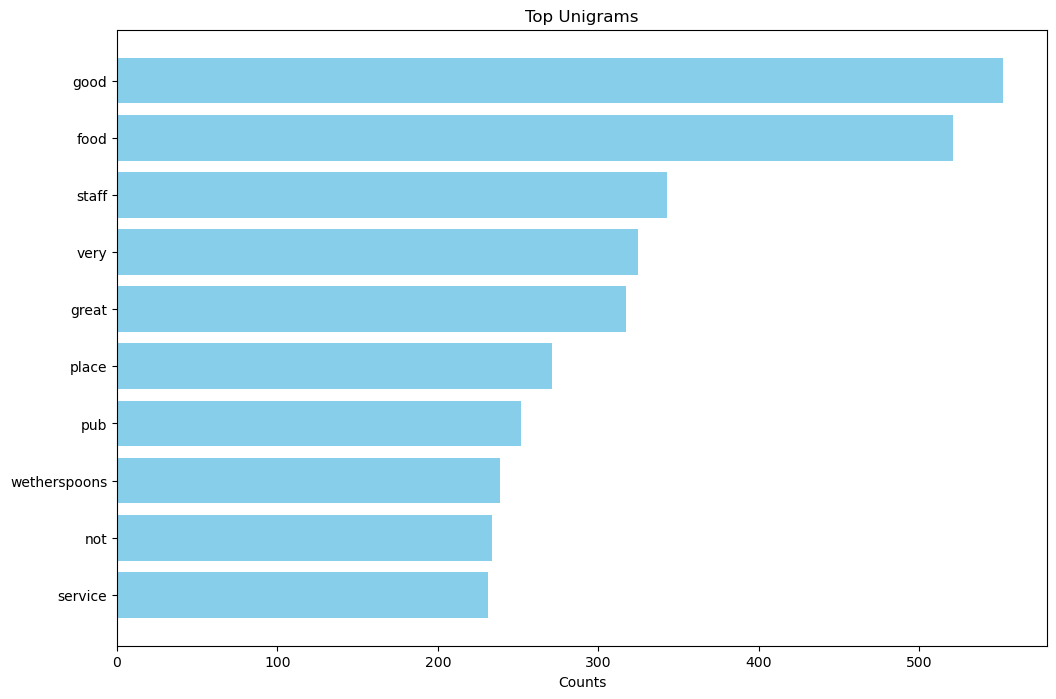

In [74]:
import matplotlib.pyplot as plt

def plot_ngrams(ngram_list, title):
    """Plot n-grams using a bar chart."""
    ngrams, counts = zip(*ngram_list)
    ngrams = [' '.join(gram) for gram in ngrams]
    
    plt.figure(figsize=(12, 8))
    plt.barh(ngrams, counts, color='skyblue')
    plt.xlabel('Counts')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Plotting the n-grams
plot_ngrams(common_unigrams_filtered, 'Top Unigrams')



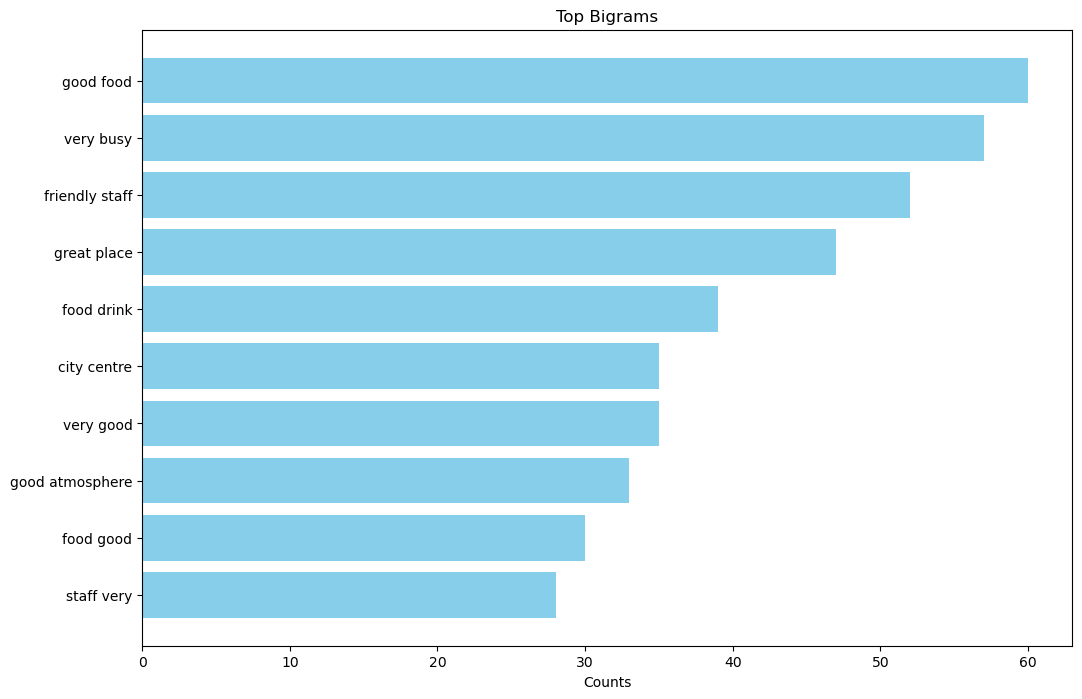

In [75]:
plot_ngrams(common_bigrams_filtered, 'Top Bigrams')


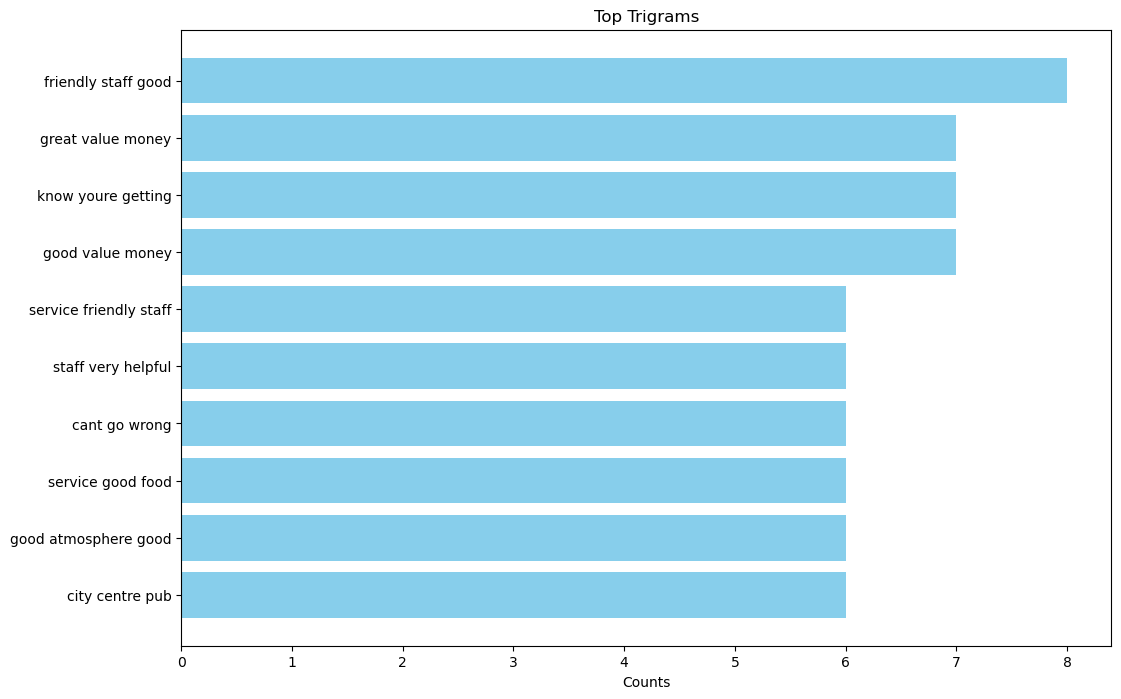

In [76]:
plot_ngrams(common_trigrams_filtered, 'Top Trigrams')

In [37]:
cl = df.loc[df.Polarity == 1, ['Review Text']].sample(10).values
for c in cl:
    print(c[0])
    print("**************************************************")

Crowded, so best NOT to be in a hurry.
**************************************************
Best spoons in Manchester
**************************************************
Well you could knock me down with a feather as for the service in here.. Signed in at the door mask on sat Down served in no time very happy with the service compared to Rochdale very happy... Thank you
**************************************************
One of the best pubs in town and definitely 1 of the best Wetherspoons
**************************************************
Best part - No reservations required.
**************************************************
One of the best Wetherspoons in the country.
**************************************************
Refillable coffee £1.45 excellent value for money
**************************************************
Excellent city centre Spoons
**************************************************
The food here is delicious. The fi …
**************************************************
A W

In [36]:
cl = df.loc[df.Polarity == 0, ['Review Text']].sample(10).values
for c in cl:
    print(c[0])
    print("**************************************************")

Can’t believe this. I got turned away for wearing trackies. From Spoons! Disgraceful, I thought Spoons was for the people
**************************************************
No review text
**************************************************
No review text
**************************************************
No review text
**************************************************
Could do with a make over
**************************************************
No review text
**************************************************
No review text
**************************************************
No review text
**************************************************
No review text
**************************************************
No review text
**************************************************


In [35]:
cl = df.loc[df.Polarity <= -0.7, ['Review Text']].sample(10).values
for c in cl:
    print(c[0])
    print("**************************************************")

Tragic
**************************************************
Horrible food, dirty place
**************************************************
Vile I hate this place with its sticky floors it wasnt my choice
**************************************************
Rubbish couldnt get served on the sunday. Went in for a coffee on the monday and after waiting 15 mins to get served they had no cups! The worst spoons ive been in!
**************************************************
Let down by th Beer... Rank.. Drink from the selection of bottles is mi advice...
**************************************************
Terrible service food abysmal
**************************************************
Horrible door staff here
**************************************************
Worst fish and chips I've ever tasted!!
**************************************************
I hate all of them because..... yawn!
**************************************************
Awful! Order through the app and waited 40 minutes for 2 shots

In [38]:
df

,Reviewer Name,Review Date,Star Rating,Review Text,Total Reviews by Reviewer,Number of Images,Image URLs,Cleaned Review,Polarity,word_count,review_len
0,Maggie Savidge,2 months ago,5,It was quite busy when we arrived so struggled...,398 reviews,4,https://lh5.googleusercontent.com/p/AF1QipNAPb...,quite busy when arrived so struggled find empt...,0.298667,25,160
1,Nicola King,4 weeks ago,4,Lovely little place in Manchester.\nFriendly s...,112 reviews,4,https://lh5.googleusercontent.com/p/AF1QipPipL...,lovely little place manchester friendly staff ...,0.330833,15,94
2,Aaron Holmes-Doyle,3 weeks ago,5,I was visiting Manchester for a night out with...,52 reviews,3,https://lh5.googleusercontent.com/p/AF1QipM8K0...,visiting manchester night close friend visited...,0.520833,23,155
3,Hiren Shah,3 months ago,5,There's nothing like a good Weatherspoons. You...,20 reviews,3,https://lh5.googleusercontent.com/p/AF1QipMGSe...,theres nothing like good weatherspoons always ...,0.464550,28,194
4,Giovanni Sumano,5 months ago,5,Beautifully decorated. You know you can't get ...,57 reviews,2,https://lh5.googleusercontent.com/p/AF1QipNOku...,beautifully decorated know cant get better dea...,0.151538,21,137
...,...,...,...,...,...,...,...,...,...,...,...
2405,Andrea S,a year ago,5,No review text,2 reviews,0,NaN,,0.000000,0,0
2406,Daniel Smith,a year ago,5,No review text,18 reviews,0,NaN,,0.000000,0,0
2407,Rob Moore,a year ago,4,No review text,17 reviews,0,NaN,,0.000000,0,0
2408,Debbie Ashworth,a year ago,5,Nice friendly staff,63 reviews,0,NaN,nice friendly staff,0.487500,3,19


In [39]:
df.to_csv('dataframe_moon_under_water.csv')

In [42]:
# Reload the uploaded dataset
df_moon_under_water = pd.read_csv('dataframe_moon_under_water.csv')

# Display the first few rows of the dataset to inspect its structure
df_moon_under_water.head()

,Unnamed: 0,Reviewer Name,Review Date,Star Rating,Review Text,Total Reviews by Reviewer,Number of Images,Image URLs,Cleaned Review,Polarity,word_count,review_len
0,0,Maggie Savidge,2 months ago,5,It was quite busy when we arrived so struggled...,398 reviews,4,https://lh5.googleusercontent.com/p/AF1QipNAPb...,quite busy when arrived so struggled find empt...,0.298667,25,160
1,1,Nicola King,4 weeks ago,4,Lovely little place in Manchester.\nFriendly s...,112 reviews,4,https://lh5.googleusercontent.com/p/AF1QipPipL...,lovely little place manchester friendly staff ...,0.330833,15,94
2,2,Aaron Holmes-Doyle,3 weeks ago,5,I was visiting Manchester for a night out with...,52 reviews,3,https://lh5.googleusercontent.com/p/AF1QipM8K0...,visiting manchester night close friend visited...,0.520833,23,155
3,3,Hiren Shah,3 months ago,5,There's nothing like a good Weatherspoons. You...,20 reviews,3,https://lh5.googleusercontent.com/p/AF1QipMGSe...,theres nothing like good weatherspoons always ...,0.464550,28,194
4,4,Giovanni Sumano,5 months ago,5,Beautifully decorated. You know you can't get ...,57 reviews,2,https://lh5.googleusercontent.com/p/AF1QipNOku...,beautifully decorated know cant get better dea...,0.151538,21,137


In [54]:
df_moon_under_water['Review Date'] = pd.to_datetime(df_moon_under_water['Review Date'])


In [55]:
df_moon_under_water = df_moon_under_water.sort_values(by='Review Date')


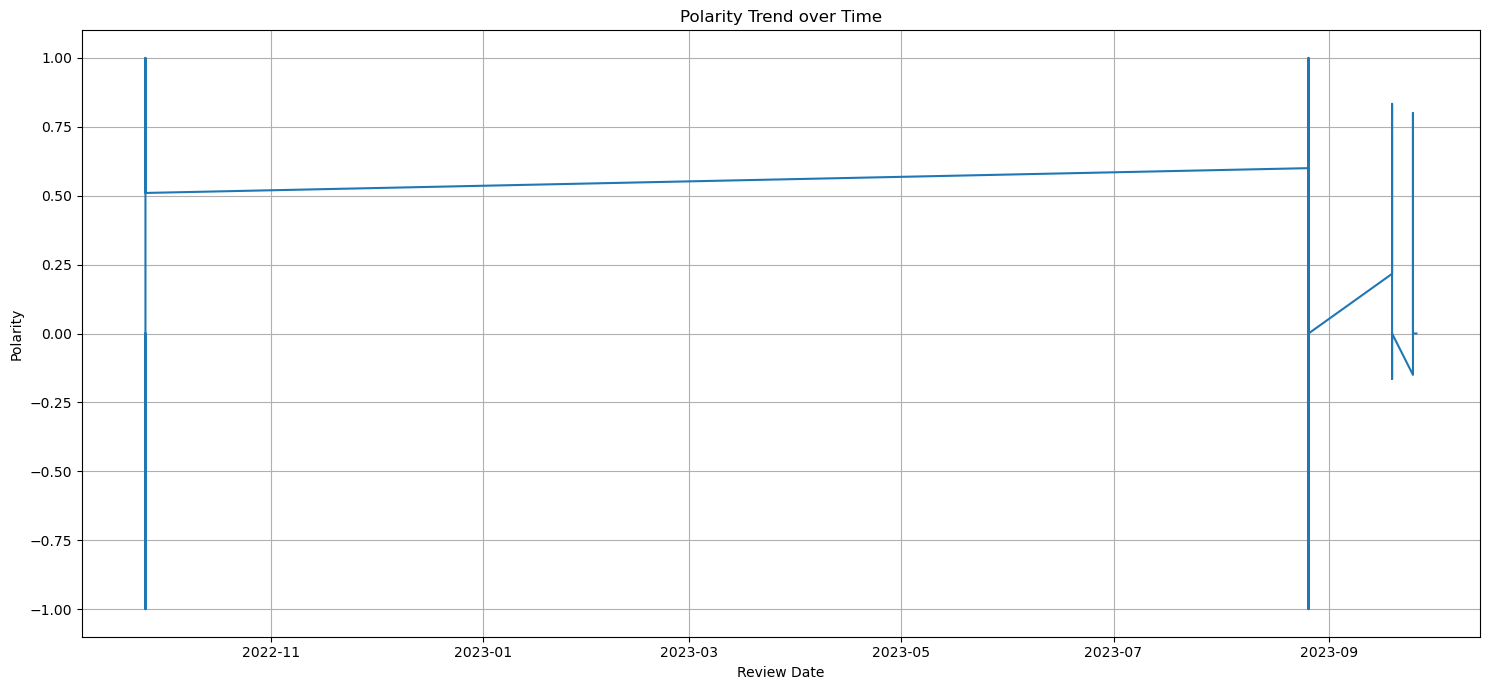

In [56]:
plt.figure(figsize=(15,7))
plt.plot(df_moon_under_water['Review Date'], df_moon_under_water['Polarity'])
plt.title('Polarity Trend over Time')
plt.xlabel('Review Date')
plt.ylabel('Polarity')
plt.grid(True)
plt.tight_layout()
plt.show()
